In [ ]:
import dm_den
import dm_den_viz
import numpy as np

In [ ]:
import matplotlib.pyplot as plt 
from matplotlib import rcParams

rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif' 
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.grid']=True
rcParams['axes.titlesize']=24
rcParams['axes.labelsize']=20
rcParams['axes.titlepad']=15
rcParams['legend.frameon'] = True
rcParams['legend.facecolor']='white'
rcParams['legend.fontsize']=18

In [8]:
df = dm_den.load_data('dm_den_202202140946.h5')

In [ ]:
dm_den_viz.plt_vs_vc('

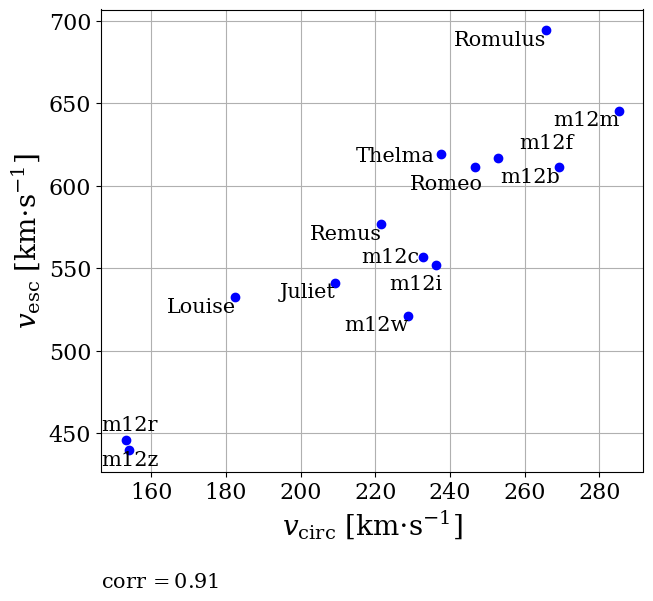

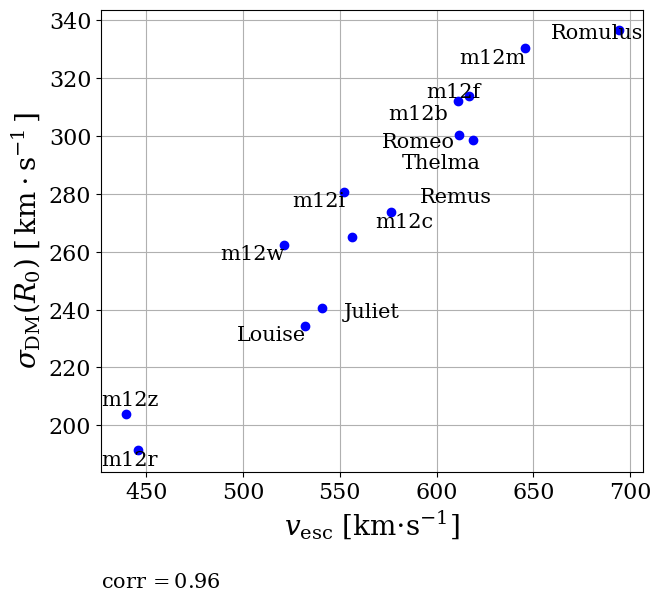

In [9]:
dm_den_viz.plotter(df, figsize=(7,6),
                   ycol='vesc_R0', 
                   ylabel='$v_\mathrm{esc}$ [km$\cdot}$s$^{-1}$]',
                   xcol='vcirc_R0', 
                   xlabel='$v_\mathrm{circ}$ [km$\cdot}$s$^{-1}$]',
                   xadjustment=None)
dm_den_viz.plotter(df, figsize=(7,6),
                   ycol='disp_dm_solar', 
                   ylabel=dm_den_viz.disp_dm_solar_label,
                   xcol='vesc_R0', 
                   xlabel='$v_\mathrm{esc}$ [km$\cdot}$s$^{-1}$]',
                   xadjustment=None)

# Trying to verify my escape velocities

In [10]:
suffix, res, mass_class, host_key = (df.loc['m12i', col] \
                                     for col in ['fsuffix', 'res', 'mass_class',
                                                 'host_key'])
_, rvir, _, _ = dm_den.get_halo_info(dm_den.build_direcs_old(suffix, res, 
                                                             mass_class,
                                                             typ='fire')[0],
                                     suffix, 'fire', host_key, mass_class)
print(rvir)

314.1809


In [4]:
dic = dm_den.unpack_4pot(df, 'm12i')

Unpacking PartType0 data


100% |##################################################################################################|


Unpacking PartType1 data


100% |##################################################################################################|


Unpacking PartType4 data


100% |##################################################################################################|


In [11]:
for r in [0., 5., 8.3, 50., 100., 200., rvir]:
    print(dm_den.calc_vesc(dic['mass'], dic['pos'], np.array([r, 0., 0.])))

838.645278074005 km / s
601.6577167453263 km / s
550.3451765358681 km / s
371.31526961881724 km / s
306.53739972216755 km / s
246.54584933219405 km / s
210.45149004487462 km / s


In [23]:
import cropper
from astropy import units as u, constants as c
from IPython import display

In [82]:
dic_cropped = cropper.load_data('m12i')

Loading m12i


100% |#########################################################################################################|


In [84]:
def compare_pot():
    rvec = 8.3 * np.array([np.cos(np.pi / 6.), np.sin(np.pi / 6.), 0.])
    coords_centered = dic['pos']
    diffs = np.linalg.norm(coords_centered - rvec, axis=1)
    i = np.argmin(diffs)
    rvec = coords_centered[i]
    print('closest vector:')
    print(rvec)
    parttype = dic['parttype'][i]
    
    # Take the particle identified in the full dictionary and find its index
    # in the cropped dictionary.
    coords_cropped = dic_cropped[parttype]['coord_centered']
    diffs_cropped = np.linalg.norm(coords_cropped - rvec, axis=1)
    i_cropped = np.argmin(diffs_cropped)
    print('closest vector in the cropped dictionary:')
    print(coords_cropped[i_cropped])
    
    pot_recorded = dic_cropped[parttype]['Potential'][i_cropped] 
    pot_recorded *= u.km**2. / u.s**2. / 0.702
    
    coords_centered = np.delete(coords_centered, i, 0)
    ms = dic['mass'] * u.M_sun * 10.**10. 
    ms = np.delete(ms, i)
    d_pos = coords_centered - rvec
    rs = np.linalg.norm(d_pos, axis=1) * u.kpc
    m_by_r = ms / rs
    pot = -c.G * m_by_r.sum()
    
    vesc_recorded = np.sqrt(2.*np.abs(pot_recorded)).to(u.km / u.s)
    vesc = np.sqrt(2.*np.abs(pot)).to(u.km / u.s)
    display(vesc_recorded)
    display(vesc)
compare_pot()

closest vector:
[ 7.20098207  4.12464205 -0.07711335]
closest vector in the cropped dictionary:
[ 7.20098207  4.12464205 -0.07711335]


<Quantity 209.1697752 km / s>

<Quantity 550.39989107 km / s>